In [13]:
import scanpy
import spatialdata
import squidpy as sq


sdata = spatialdata.read_zarr("/Volumes/DATA_2025/Projects/RAO/dbs/Xenium_and_AdjustedPhenoCycler.V9.zarr")
adata = sdata.tables["GeneTranscripts_XStock_PhenCyc_Props_Ann"]
adata

adata.obs['cell_type_manuel'] = (
    adata.obs['cell_type_manuel']
        .str.replace(" ", "_", regex=False)
        .str.replace("/", "OR",   regex=False)
        .str.replace(",", "AND",   regex=False)
        .str.replace("+", "",   regex=False)
        .str.replace(")", "_",   regex=False)
        .str.replace("(", "_",   regex=False)

)
adata.obs['cell_type_manuel'] = adata.obs['cell_type_manuel'].astype('category')


version mismatch: detected: RasterFormatV02, requested: FormatV04
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/z

In [14]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [15]:
sq.gr.centrality_scores(adata, cluster_key="cell_type_manuel")

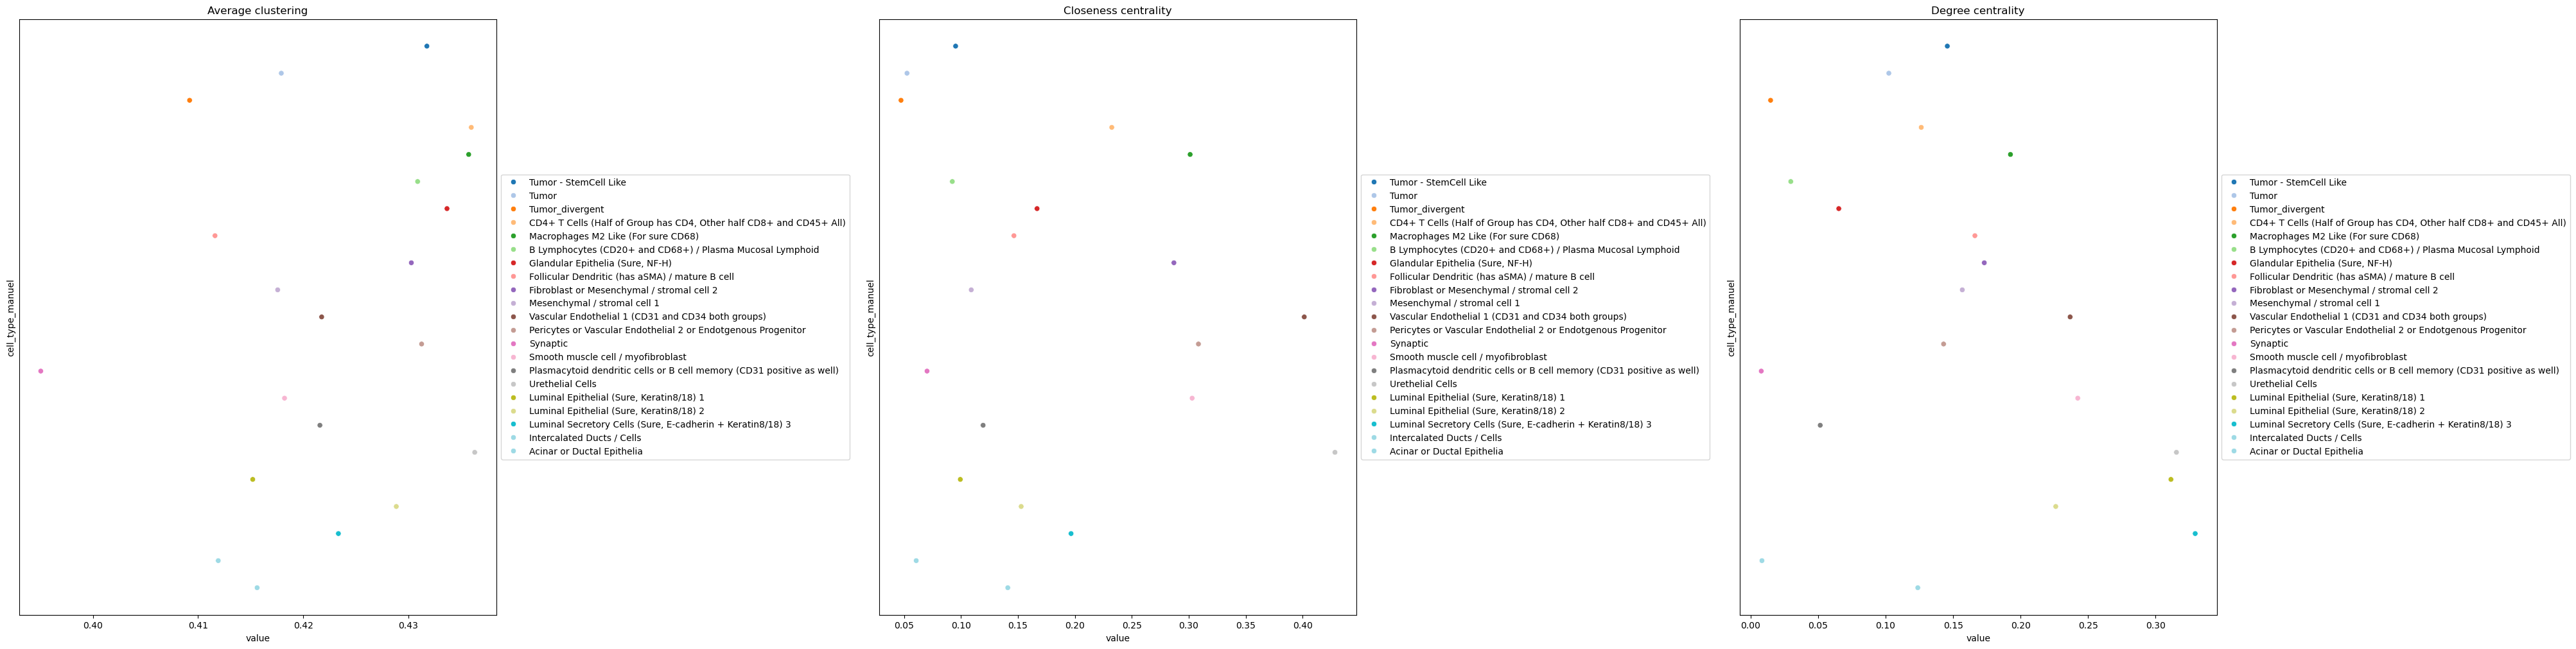

In [4]:
sq.pl.centrality_scores(adata, palette= "tab20" ,cluster_key="cell_type_manuel",figsize=(40, 10))

In [16]:
import scanpy as sc

sdata.tables["GeneTranscripts_XStock_PhenCyc_Props_Ann_SubSamp"] = sc.pp.subsample(adata, fraction=0.5, copy=True)
adata_subsample = sdata.tables["GeneTranscripts_XStock_PhenCyc_Props_Ann_SubSamp"]
adata_subsample.obs["cell_type_manuel"]


77132     Vascular_Endothelial_1__CD31_and_CD34_both_gro...
49819           Luminal_Epithelial__SureAND_Keratin8OR18__1
73493                   Smooth_muscle_cell_OR_myofibroblast
9994      Luminal_Secretory_Cells__SureAND_E-cadherin__K...
29573           Luminal_Epithelial__SureAND_Keratin8OR18__1
                                ...                        
44684           Luminal_Epithelial__SureAND_Keratin8OR18__1
826       CD4_T_Cells__Half_of_Group_has_CD4AND_Other_ha...
7657                                                  Tumor
22134     Luminal_Secretory_Cells__SureAND_E-cadherin__K...
110025                  Smooth_muscle_cell_OR_myofibroblast
Name: cell_type_manuel, Length: 56636, dtype: category
Categories (21, object): ['Acinar_or_Ductal_Epithelia', 'B_Lymphocytes__CD20_and_CD68__OR_Plasma_Mucos..., 'CD4_T_Cells__Half_of_Group_has_CD4AND_Other_h..., 'Fibroblast_or_Mesenchymal_OR_stromal_cell_2', ..., 'Tumor_-_StemCell_Like', 'Tumor_divergent', 'Urethelial_Cells', 'Vascular_E

In [ ]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="cell_type_manuel",
)


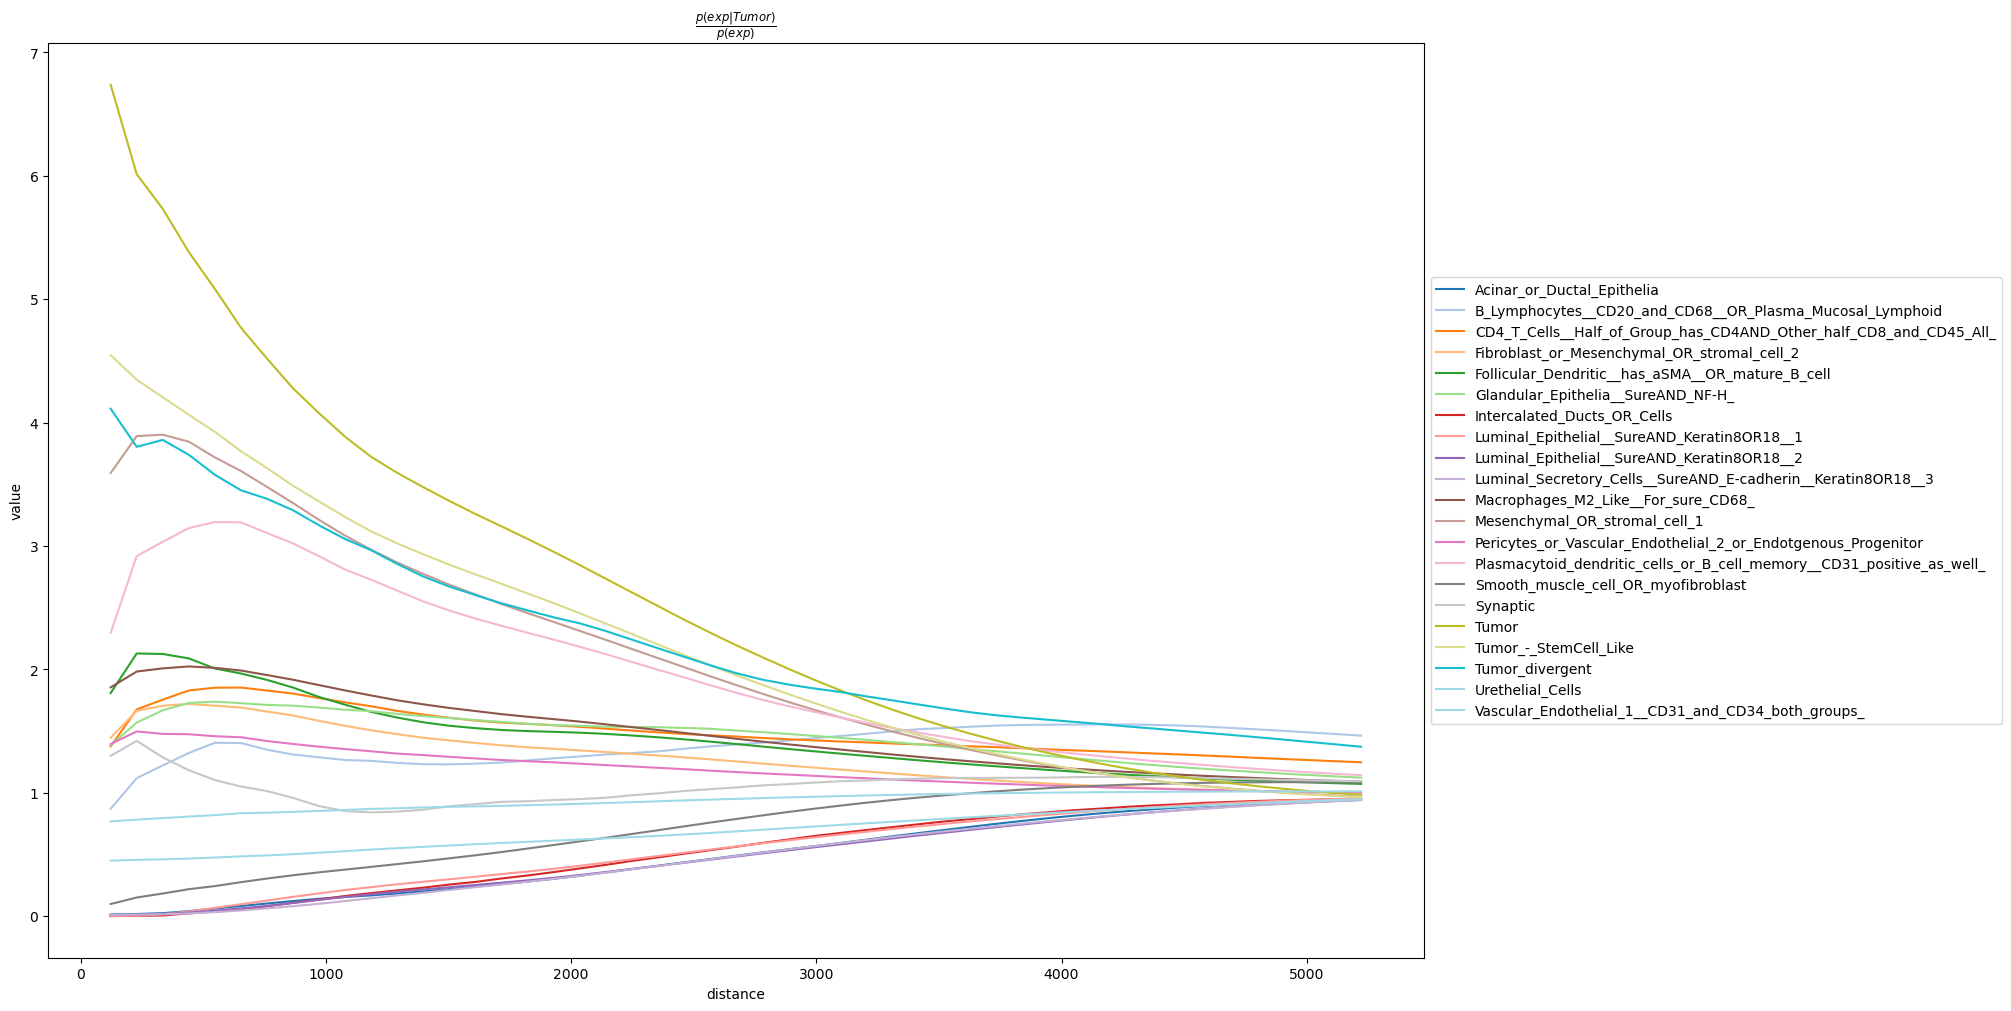

In [20]:
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="cell_type_manuel",
    clusters="Tumor",
    figsize=(20, 10),
)

/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


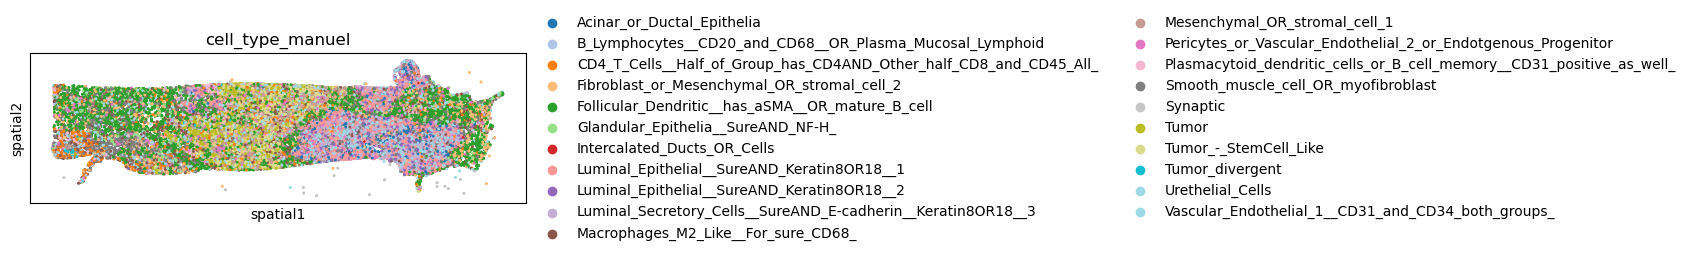

In [22]:
sq.pl.spatial_scatter(
    adata_subsample,
    color="cell_type_manuel",
    shape=None,
    size=4,
)

  0%|          | 0/1000 [00:00<?, ?/s]/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/ugursahin/miniforge3/envs/ScanPy/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
100%|██████████| 1000/1000 [00:10<00:00, 96.15/s]


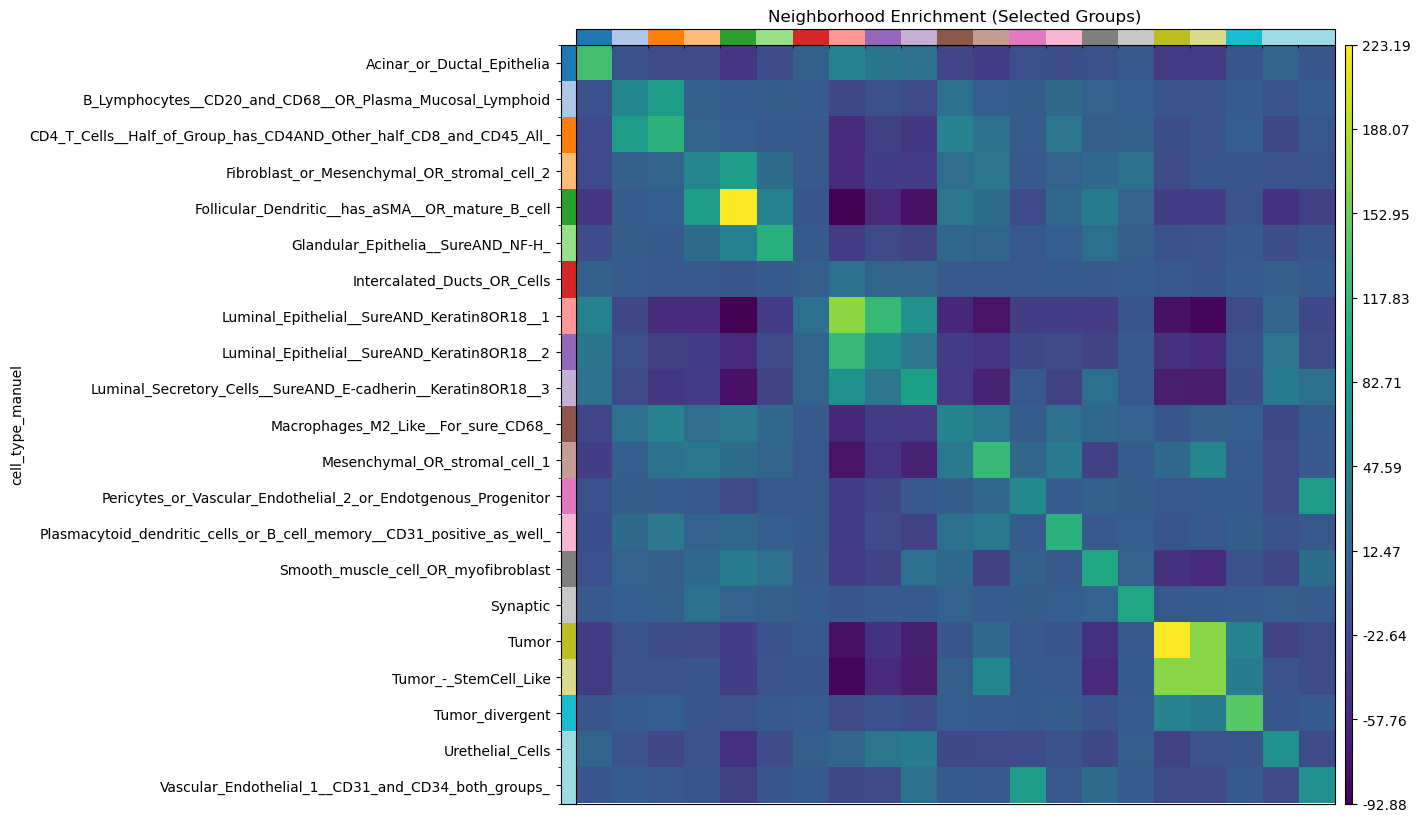

In [23]:
sq.gr.nhood_enrichment(adata, cluster_key="cell_type_manuel")

sq.pl.nhood_enrichment(
    adata,
    cluster_key="cell_type_manuel",
    title="Neighborhood Enrichment (Selected Groups)",
    figsize=(8, 8),
    palette="tab20",
    cmap="viridis"
)